# Upper Confidence Bound (UCB)

## Importing the libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [5]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [8]:
import math

# Number of who saw the ads
N = 10000

# Total of ads
d = 10

# Full list of ads selected over the rounds
ads_selected = []

# Ni(n) - number of times the ad i was selected up to round n
# initialized as a list of 10 zeroes
numbers_of_selections = [0] * d

# Ri(n) - sum of rewards of the ad i up to round n
# initialized as a list of 10 zeroes
sums_of_rewards = [0] * d

# Acumulated rewards over the rounds
total_reward = 0

# For each round (from 0 to number of users viewing the ads)
for n in range(0, N):
  ad = 0 # Starting from add 0
  max_upper_bound = 0 # This will be updated to the actual max upper confidence bound
  # For each ad
  for i in range(0, d):

    if (numbers_of_selections[i] > 0):
      # STEP 1 - Calculating ri(n) = Ri(n) / Ni(n) for each ad
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]
      # STEP 2 -Calculating delta i
      delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
      # STEP 3 - Calculating UCB
      upper_bound = average_reward + delta_i

    # if the add hasnt been selected yet, update UCB to a "super high" value
    else:
      upper_bound = 1e400

    # Update UCB in order to select the ad
    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = i

  # Update the full list of ads selected
  ads_selected.append(ad)

  # Update the number of times the ad was selected
  numbers_of_selections[ad] = numbers_of_selections[ad] + 1

  # Selecting the row and column of the add in order to get the reward
  reward = dataset.values[n, ad]

  # Sumarizing rewards for each ad
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward

  # Totalizing the number of rewards
  total_reward = total_reward + reward

print(ads_selected)
print(numbers_of_selections)
print(sums_of_rewards)
print(total_reward)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 0, 8, 1, 2, 3, 4, 5, 6, 6, 7, 7, 7, 9, 7, 0, 6, 8, 1, 2, 3, 4, 4, 4, 4, 4, 5, 9, 7, 0, 0, 6, 8, 4, 0, 7, 1, 1, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 7, 7, 7, 7, 7, 4, 2, 3, 5, 9, 1, 6, 8, 0, 0, 7, 0, 4, 1, 6, 8, 2, 3, 5, 9, 7, 0, 4, 4, 4, 7, 7, 7, 7, 1, 6, 8, 2, 3, 5, 9, 0, 7, 7, 4, 7, 7, 7, 1, 6, 8, 0, 4, 4, 2, 3, 5, 9, 4, 7, 0, 7, 1, 1, 1, 6, 6, 6, 6, 6, 8, 4, 2, 3, 5, 9, 7, 7, 7, 0, 6, 4, 1, 1, 1, 8, 7, 2, 3, 5, 9, 4, 0, 1, 1, 1, 6, 7, 8, 4, 1, 2, 3, 5, 9, 0, 6, 7, 8, 4, 7, 1, 0, 6, 2, 3, 5, 9, 7, 7, 7, 7, 4, 4, 4, 4, 4, 7, 8, 1, 0, 6, 6, 6, 7, 4, 2, 3, 5, 9, 1, 6, 8, 7, 0, 4, 4, 4, 4, 4, 2, 3, 5, 9, 1, 6, 7, 4, 8, 0, 7, 4, 4, 4, 1, 6, 2, 3, 5, 9, 0, 0, 0, 7, 8, 4, 0, 0, 0, 1, 6, 7, 4, 2, 3, 5, 9, 0, 8, 7, 1, 6, 4, 0, 7, 7, 7, 7, 7, 2, 3, 5, 9, 8, 4, 1, 6, 6, 6, 7, 7, 7, 0, 6, 7, 4, 1, 1, 1, 2, 2, 2, 3, 5, 9, 2, 8, 7, 0, 1, 6, 4, 7, 2, 8, 3, 5, 9, 9, 9, 9, 4, 0, 1, 

## Visualising the results

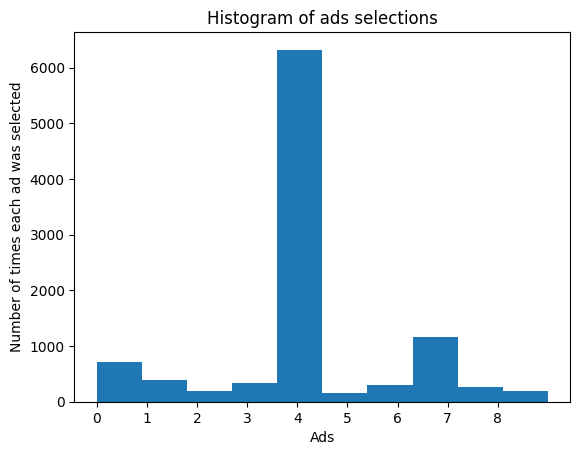

In [10]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.xticks(range(0,9,1))
plt.ylabel('Number of times each ad was selected')
plt.show()